In [57]:
import datetime as dt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as scipy
from matplotlib import rc
import matplotlib
import yfinance
import seaborn as sns
plt.style.use('seaborn')

In [69]:
tickers = ["IEMG", "IVV", "IEV", "GC=F", "HYG", "IXG", "IYR", "EXI", "BZ=F", "IXN"]
spx = tickers
#spx = pd.read_csv('../data/spx.csv').stack().tolist()

**Downloading data and calculating returns**

In [70]:
raw_data = yfinance.download(spx, start="2013-1-1", back_adjust=True, auto_adjust=True)
closing_prices = raw_data['Close']
returns = closing_prices.pct_change().iloc[1:].ffill()-(1**(1/250)-1)

[*********************100%***********************]  10 of 10 completed


**Fitting distribution to data and drawing data**

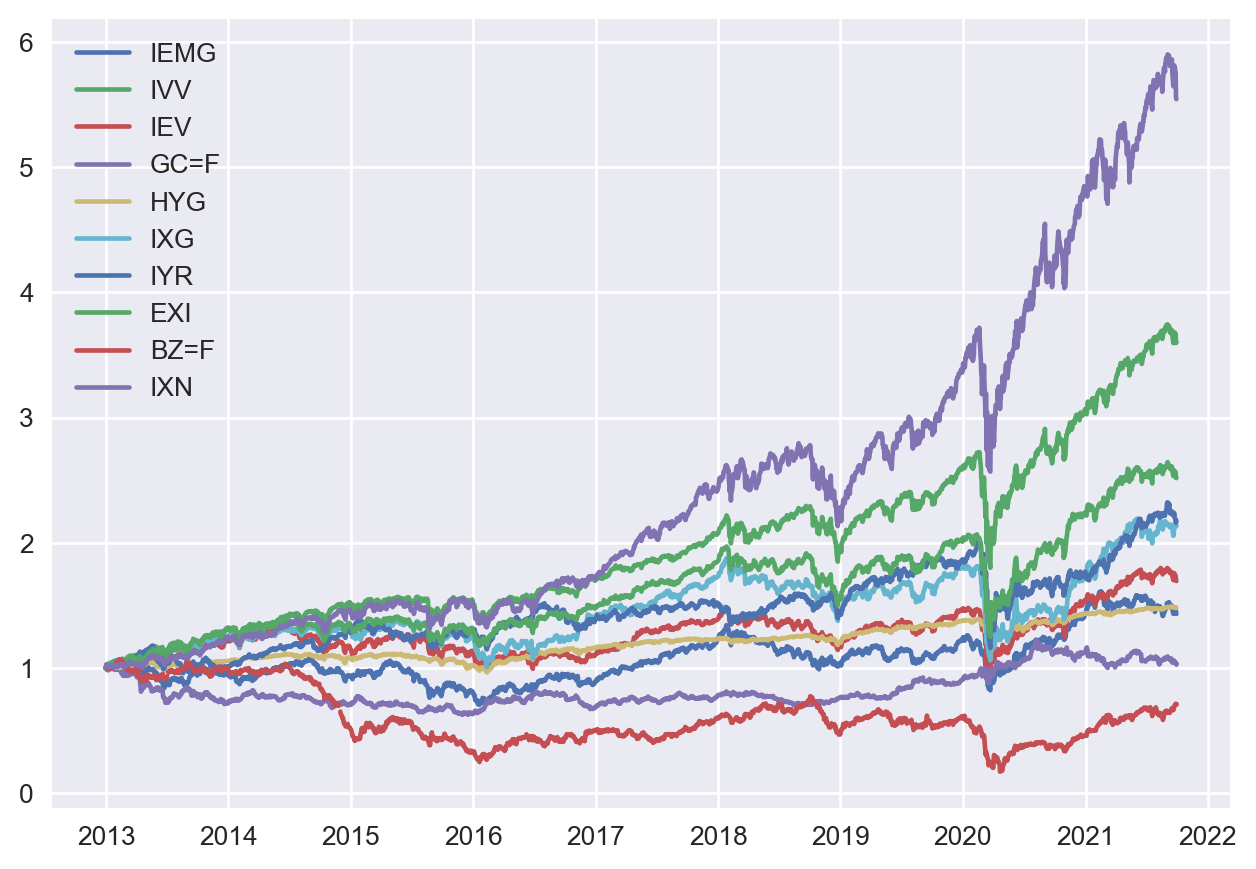

In [83]:
fig, ax = plt.subplots(1, 1, dpi=190)
for ticker in tickers:
    ax.plot(closing_prices[ticker]/closing_prices[ticker].iloc[0], label=ticker)
ax.legend()
    #ax.plot(closing_prices/closing_prices.iloc[0])

In [77]:
ticker="IXG"

mu, std = scipy.norm.fit(returns[ticker]) #normal distribution fi#t
beta, loc_ged, scale_ged = scipy.gennorm.fit(returns[ticker]) #GED f#it
df, nc_t, loc_t, scale_t = scipy.nct.fit(returns[ticker]) #skewed student's t distrubiton fit

#draw data
xmin = returns[ticker].min()
xmax = returns[ticker].max()
x = np.linspace(xmin, xmax, 1000)

normal_data=scipy.norm.pdf(x, mu, std)
GED_data=scipy.gennorm.pdf(x, beta,loc_ged,scale_ged)
t_data=scipy.nct.pdf(x, df,nc_t,loc_t,scale_t)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:2407: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu


**Plotting data**

Text(0, 1, 'Probability Density')

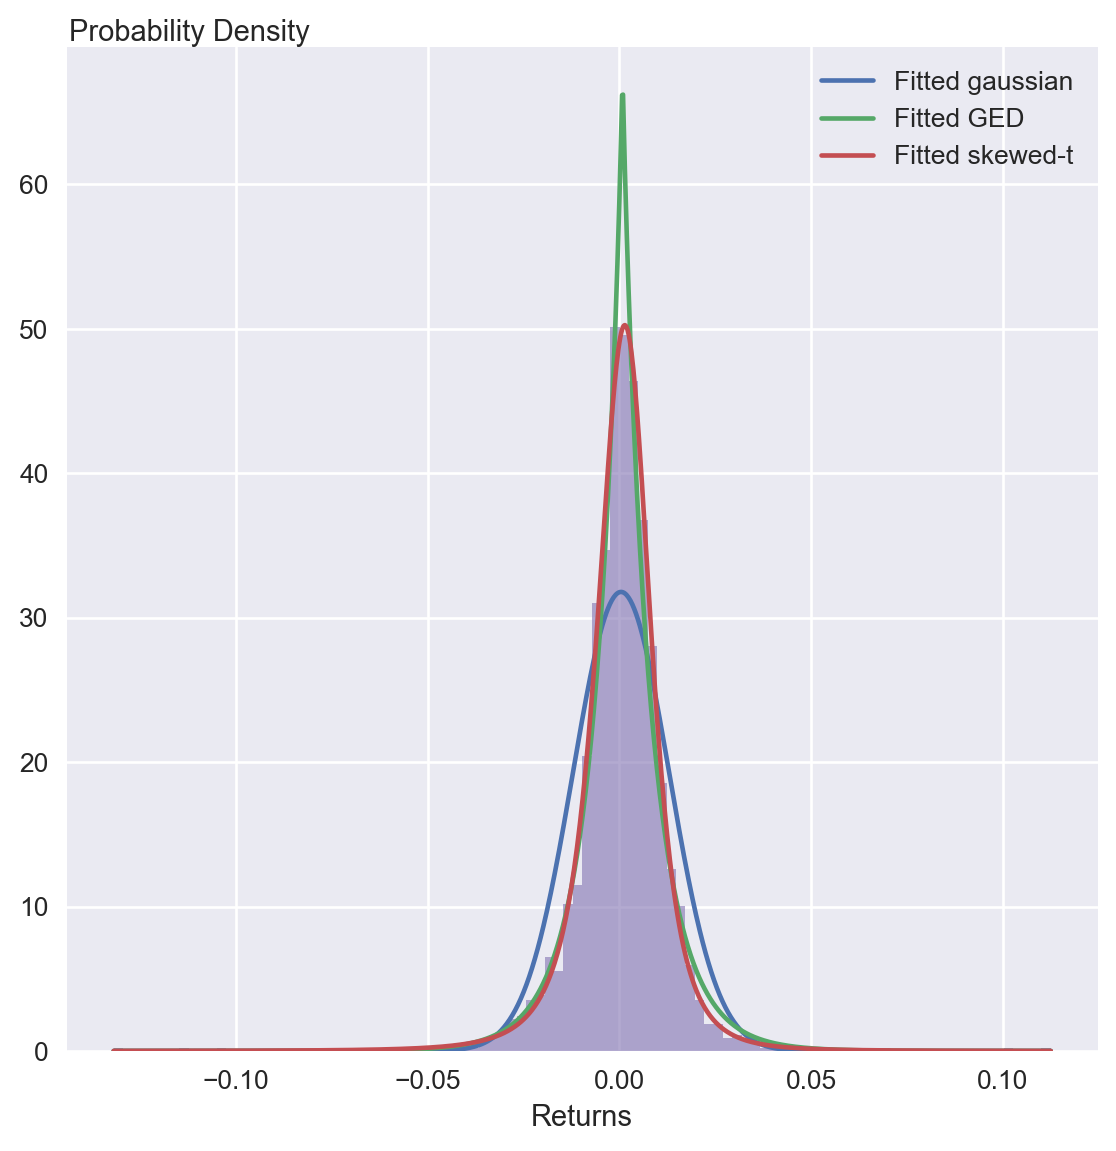

In [78]:
plt.style.use('seaborn')
fig, ax = plt.subplots(1, 1, figsize=(7, 7), dpi=190)
ax.plot(x, normal_data, label="Fitted gaussian")#, c="blue")
ax.plot(x, GED_data, label="Fitted GED")#, c = "black")
ax.plot(x, t_data, label ="Fitted skewed-t")#, c="red")
ax.hist(returns[ticker], bins=100, alpha=0.6, density = True)
#ax.set_xlim(-0.075, 0.075)
ax.legend()
ax.set_xlabel('Returns') 
ax.set_ylabel('Probability Density',loc='top', rotation = 0, labelpad = -110) 
#fig.savefig("Density.png", bbox_inches = 'tight', pad_inches = 0.1)

In [ ]:
f, ax1 = plt.subplots(1, 1, figsize=(15,12))
ax1.plot(returns[ticker], alpha=.8)
ax1.set_ylabel('Yearly Returns',loc='top', rotation = 0, labelpad = -100)
ax1.set_ylim((-0.35,0.35))
#plt.savefig("Empirical timeseries.png", bbox_inches = 'tight', pad_inches = 0.1)

f, ax2 = plt.subplots(1, 1, figsize=(15,12))
ax2.plot(normal_data, alpha=.8)
ax2.set_ylabel('Yearly Returns',loc='top', rotation = 0, labelpad = -100)
ax2.set_ylim((-0.35,0.35))
#plt.savefig("Gaussian timeseries.png", bbox_inches = 'tight', pad_inches = 0.1)

f, ax3 = plt.subplots(1, 1, figsize=(15,12))
ax3.plot(GED_data, alpha=.8)
ax3.set_ylabel('Yearly Returns',loc='top', rotation = 0, labelpad = -100)
ax3.set_ylim((-0.35,0.35))
#plt.savefig("GED timeseries.png", bbox_inches = 'tight', pad_inches = 0.1)

f, ax4 = plt.subplots(1, 1, figsize=(15,12))
ax4.plot(t_data, alpha=.8)
ax4.set_ylabel('Yearly Returns',loc='top', rotation = 0, labelpad = -100)
ax4.set_ylim((-0.35,0.35))
#plt.savefig("Skewed Student's t timeseries.png", bbox_inches = 'tight', pad_inches = 0.1)